# Attempt to build POMDP code from scratch

In [126]:
import math
import numpy as np
import matplotlib
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sb

In [127]:
# Initial Conditions

actions = ['l_att','right_att']
states = ['left','right']
trans_prob = 0.8
tau_r = 2
initial_reward_left = 1
initial_reward_right = 1
initial_belief_left = 0.48
initial_belief_right = 0.52
mu_left = 1
mu_right = -1
sigma = 0.01 # still to be defined
sigma_left = 0.01 #dominant and suppressed
sigma_right = 0.0001 

In [128]:
# Belief and Belief updater

belief_left = 0.3
belief_right = 0.4

# define first state due to belief:


In [129]:
# Drawing observations

# for left side (just to test)

obsVal = np.random.normal(mu_left, sigma, 1) # say left eye get 1 (mu = 1), and right eye -1 (mu = -1)
print(obsVal)

obsProb = norm.pdf(obsVal, loc=mu_left, scale=sigma_left) #normalize
print(obsProb)

# --> makes no sense to me



[0.98593698]
[14.84093166]


In [130]:
# Belief update

belief_update = obsProb*trans_prob*initial_belief_left # also have to normalize this with Z

In [131]:
# Switch function/ Decision-maker --> should also include counter for gamma distribution

# value_left = belief_right*rewards_left*trans_prob

# value_right = belief_left*rewards_right*trans_prob

# if value_left > value_right
    # states.append(0)
# else
    # states.append(1)



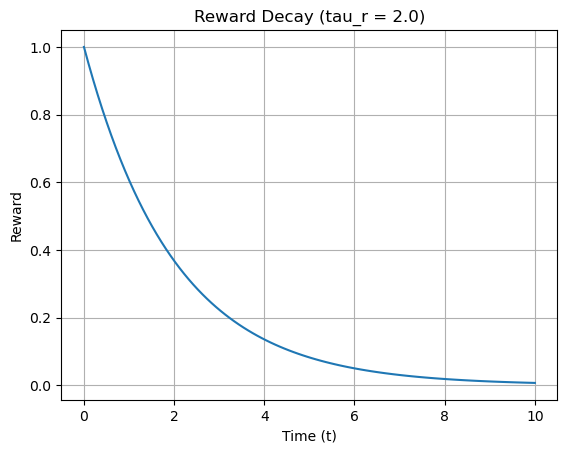

In [132]:
import numpy as np
import matplotlib.pyplot as plt

def Reward(t, tau_r):
    return np.exp(-t / tau_r)

def plot_rewards(tau_r):
    t = np.linspace(0, 10, 100)  # Range of time values
    rewards = np.zeros_like(t)  # Initialize an array for rewards

    for i, time in enumerate(t):
        rewards[i] = Reward(time, tau_r)

    plt.plot(t, rewards)
    plt.xlabel('Time (t)')
    plt.ylabel('Reward')
    plt.title(f'Reward Decay (tau_r = {tau_r})')
    plt.grid(True)
    plt.show()

# Example usage
tau_r = 2.0
plot_rewards(tau_r)


[0 0 0 0 0 1 0 1 0 0]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


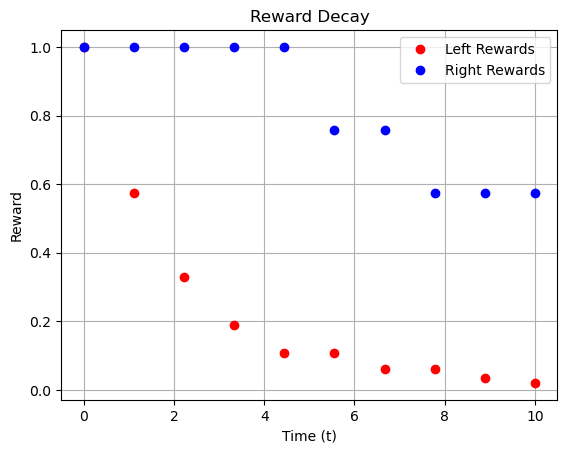

In [133]:
# reward decay for when we do not reinitialize


import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 10)
states = np.random.choice([0, 1], size=len(t))
print(states)
tau_r_left = 2
tau_r_right = 4

rewards_left = np.ones_like(t)
print(rewards_left)
rewards_right = np.ones_like(t)

for i in range(1, len(t)):
    if states[i] == 0:
        rewards_left[i] = rewards_left[i-1] * np.exp(-(t[i] - t[i-1]) / tau_r_left)
        rewards_right[i] = rewards_right[i-1]
    else:
        rewards_left[i] = rewards_left[i-1]
        rewards_right[i] = rewards_right[i-1] * np.exp(-(t[i] - t[i-1]) / tau_r_right)

plt.plot(t, rewards_left, 'ro', label='Left Rewards')
plt.plot(t, rewards_right, 'bo', label='Right Rewards')

plt.xlabel('Time (t)')
plt.ylabel('Reward')
plt.title('Reward Decay')
plt.grid(True)
plt.legend()
plt.show()


10
[0 1 0 1 1 0 0 0 1 1]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


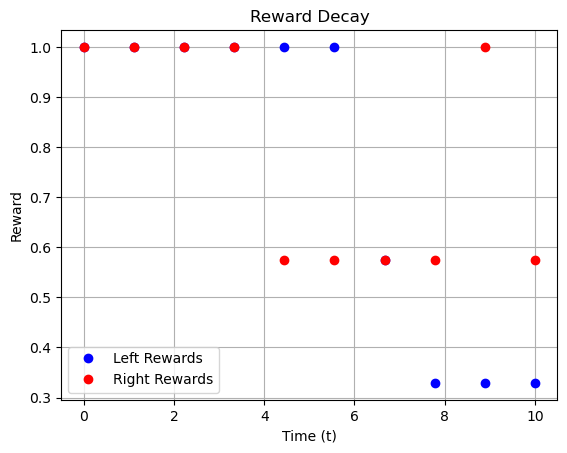

In [134]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 10)
states = np.random.choice([0, 1], size=len(t))
print(len(t))
print(states)
tau = 2

rewards_left = np.ones_like(t)
print(rewards_left)
rewards_right = np.ones_like(t)
print(rewards_right)
initial_reward_left = 1
initial_reward_right = 1

for i in range(1, len(t)):
    if states[i] == 0:
        rewards_left[i] = rewards_left[i-1] * np.exp(-(t[i] - t[i-1]) / tau)
        rewards_right[i] = rewards_right[i-1]
        if states[i-1] == 1:
            rewards_left[i] = initial_reward_left
    else:
        rewards_left[i] = rewards_left[i-1]
        rewards_right[i] = rewards_right[i-1] * np.exp(-(t[i] - t[i-1]) / tau)
        if states[i-1] == 0:
            rewards_right[i] = initial_reward_right

plt.plot(t, rewards_left, 'bo', label='Left Rewards')
plt.plot(t, rewards_right, 'ro', label='Right Rewards')

plt.xlabel('Time (t)')
plt.ylabel('Reward')
plt.title('Reward Decay')
plt.grid(True)
plt.legend()
plt.show()


7
[0 0 0 1 1 0 0]
[1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1.]


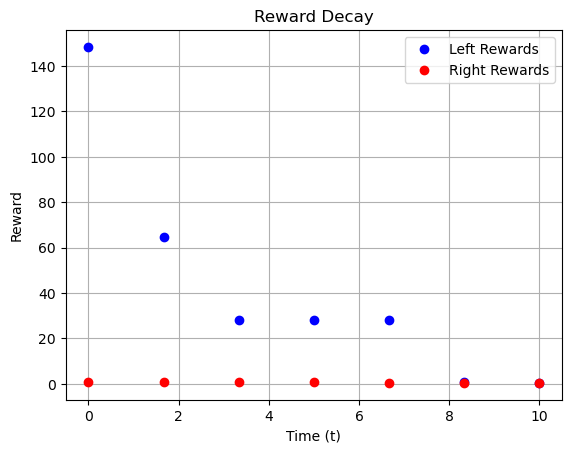

In [135]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 7) # time steps
states = np.random.choice([0, 1], size=len(t)) # initialized states
print(len(t)) # just to check to see how many time steps we have 
print(states) # just to check the states
tau = 2 # decaying constant

rewards_left = np.ones_like(t) # initial reward for left 1
print(rewards_left)
rewards_right = np.ones_like(t) # initial reward for right 1
print(rewards_right)
initial_reward_left = 1
initial_reward_right = 1

for i in range(len(t)): # we start at 1, because at 0 the reward is 1: vector/list rewards_left, rewards_right
    # the problem is that with this we skip one state/ we do not care what state we are in in i == 0, but we still start counting from state == 1 ????
    if states[i] == 0:
        rewards_left[i] = rewards_left[i-1] * np.exp(-(t[i] - t[i-1]) / tau)
        rewards_right[i] = rewards_right[i-1]
        if states[i-1] == 1:
            rewards_left[i] = initial_reward_left
    else:
        rewards_left[i] = rewards_left[i-1]
        rewards_right[i] = rewards_right[i-1] * np.exp(-(t[i] - t[i-1]) / tau)
        if states[i-1] == 0:
            rewards_right[i] = initial_reward_right

plt.plot(t, rewards_left, 'bo', label='Left Rewards')
plt.plot(t, rewards_right, 'ro', label='Right Rewards')

plt.xlabel('Time (t)')
plt.ylabel('Reward')
plt.title('Reward Decay')
plt.grid(True)
plt.legend()
plt.show()

[1 1 1 1 1 1 1 0 1 0]


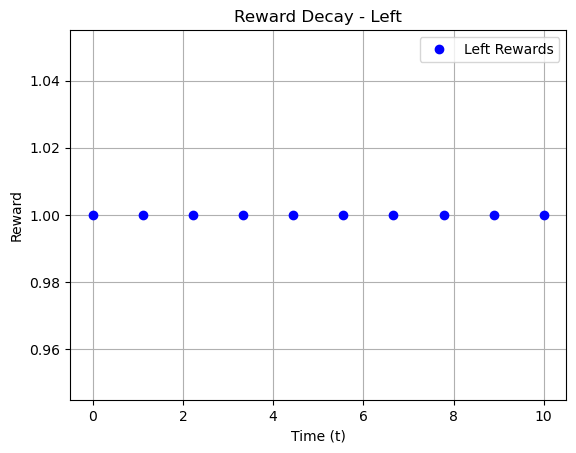

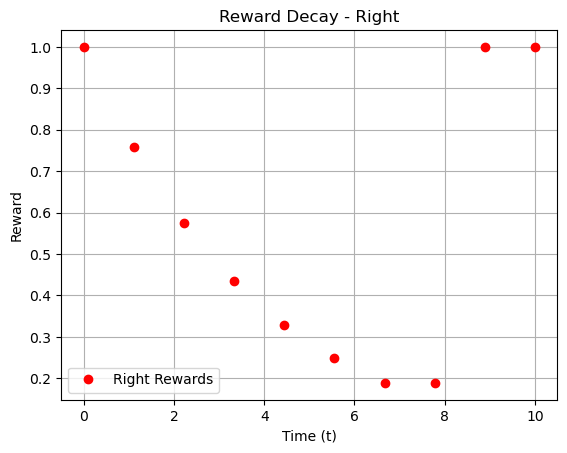

In [136]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 10)
states = np.random.choice([0, 1], size=len(t))
print(states)
tau_r_left = 2
tau_r_right = 4

rewards_left = np.ones_like(t)
rewards_right = np.ones_like(t)
initial_reward_left = 1
initial_reward_right = 1

rewards_left[-1] = initial_reward_left
rewards_right[-1] = initial_reward_right

for i in range(1, len(t)):
    if states[i] == 0:
        rewards_left[i] = rewards_left[i-1] * np.exp(-(t[i] - t[i-1]) / tau_r_left)
        rewards_right[i] = rewards_right[i-1]
        if states[i-1] == 1:
            rewards_left[i] = initial_reward_left
    else:
        rewards_left[i] = rewards_left[i-1]
        rewards_right[i] = rewards_right[i-1] * np.exp(-(t[i] - t[i-1]) / tau_r_right)
        if states[i-1] == 0:
            rewards_right[i] = initial_reward_right

plt.figure(1)
plt.plot(t, rewards_left, 'bo', label='Left Rewards')
plt.xlabel('Time (t)')
plt.ylabel('Reward')
plt.title('Reward Decay - Left')
plt.grid(True)
plt.legend()

plt.figure(2)
plt.plot(t, rewards_right, 'ro', label='Right Rewards')
plt.xlabel('Time (t)')
plt.ylabel('Reward')
plt.title('Reward Decay - Right')
plt.grid(True)
plt.legend()

plt.show()
